## Assignment 2 (Part b):  Polynomial Regression

The univariate (one dependent variable) and multivariate (more than one dependent variable) linear regression we have discussed so far always assumes a linear relationship between the independent and dependent variables.  In the real world, it is very common to have data where there is a non-linear relationship between the independent and dependent variables.  In these cases, we can use polynomial regression where we assume the relationship between the independent variable x and the dependent variable(s) y is modelled as an nth degree polynomial in x.

For example, we discussed briefly in lecture that the relationship between number of miles walked per day and age can be modeled by a quadratic equation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as s
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 8)
sns.set()
sns.set(font_scale=1.5)

import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split

np.random.seed(1234)

In [2]:
kms = np.random.normal(5, 2, 50)
ages = np.random.normal(40,13,50)
ages = [a if a > 0 else -a for a in ages]

In [3]:
first_kms = sorted(kms[0:int(round(len(kms)/2,0))])
second_kms = sorted(kms[int(round(len(kms)/2,0)):len(kms)], reverse=True)

ages = sorted(ages)
kms = first_kms + second_kms
print(len(kms))
print(len(ages))

50
50


In [4]:
df = pd.DataFrame({"age": ages, "kilometers": kms})

In [5]:
df
#below is a dataframe I made to experiment with polynomial regression

,age,kilometers
0,6.325717,0.514630
1,8.794103,0.957490
2,21.204469,1.906189
3,21.774347,2.618049
4,25.015432,3.558823
5,25.145793,3.688061
6,26.103146,3.726953
7,26.637943,4.331845
8,27.334928,4.374696
9,27.958694,4.594707


## Question 1. Plot histogram of age and kilometers and age vs. kilometers (sample output shown in the graphs below) (2 points)


(array([ 2.,  0.,  2.,  7.,  6., 10., 11.,  7.,  3.,  2.]),
 array([ 6.32571659, 12.33292964, 18.34014268, 24.34735573, 30.35456878,
        36.36178183, 42.36899488, 48.37620793, 54.38342097, 60.39063402,
        66.39784707]),
 <a list of 10 Patch objects>)

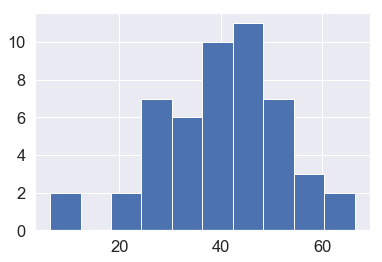

In [6]:
#your code here
#sample output shown below
plt.hist(df['age'])

(array([ 4.,  1.,  2.,  6., 11.,  9.,  9.,  7.,  0.,  1.]),
 array([0.51463009, 1.44135919, 2.36808828, 3.29481737, 4.22154647,
        5.14827556, 6.07500466, 7.00173375, 7.92846284, 8.85519194,
        9.78192103]),
 <a list of 10 Patch objects>)

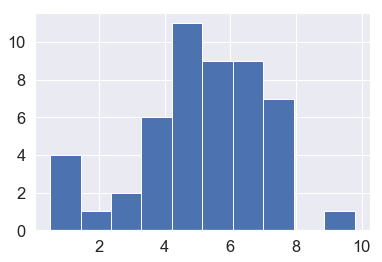

In [7]:
#your code here
#sample output shown here
plt.hist(df['kilometers'])

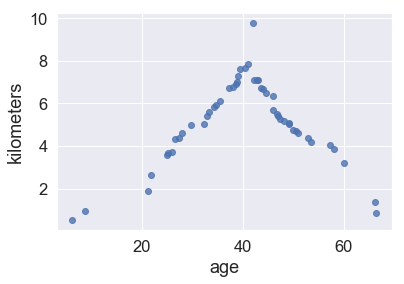

In [8]:
# plot kilometers vs. age
#your code goes here
#sample output shown below

ax = sns.regplot(x='age', y='kilometers', data=df, fit_reg=False)

## Question 2. Does the above relationship look linear to you?  If no, what kind of relationship do you think it is? (1 point)


Does the above relationship look linear to you?  If no, what kind of relationship do you think it is?

</br>
</br>
</br>

No, the above relationship does not look linear to me; the relationship looks parabolic.  A parabola is the result of a quadratic function (a polynomial of degree 2). It seems kilometers walked per day is related to the square of age.  Since the parabola is inverted (upside down 'U' shape), the squared 'age' term should have a negative sign. 

## Question 3. Fit a parabola (a 2-degree polynomial) to the data (3 points)


In [9]:
pd.options.mode.chained_assignment = None  # default='warn'

# Define our dependent variable
y_column = 'kilometers'
y = df[y_column]
# Define our independent variables
x_columns = ['age']
X = df[x_columns]


#your code goes here

# Sample output shows 40 observations, so dataset split 80/20 train-test. Use 'random_state'=42 same as in-class 
# assignment.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train = pd.concat([pd.DataFrame(y_train), X_train], axis=1)

quadmodel = sm.ols(formula = 'kilometers~np.power(age,2)+age', data = train)
model = quadmodel.fit()
print(model.summary())
#sample output shown below

                            OLS Regression Results                            
Dep. Variable:             kilometers   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     57.38
Date:                Tue, 25 Feb 2020   Prob (F-statistic):           4.57e-12
Time:                        04:50:24   Log-Likelihood:                -52.635
No. Observations:                  40   AIC:                             111.3
Df Residuals:                      37   BIC:                             116.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -4.1822      0.881  

## Question 4. Predit on training data and plot the results (1 point)


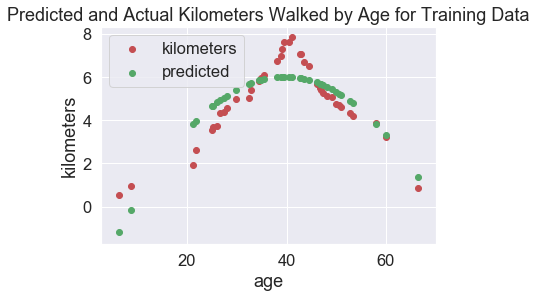

In [10]:
# Get predictions for the training data 
train['predicted'] = model.predict(X_train)

#your code goes here
# Plot predicted vs true kilometers by age for train data
plt.scatter(X_train, y_train, c='r')
plt.scatter(X_train, train['predicted'], c='g')
plt.title('Predicted and Actual Kilometers Walked by Age for Training Data')
plt.xlabel('age')
plt.ylabel('kilometers')
plt.legend()
plt.show()
#sample output shown below


In [11]:
p = model.params
p

Intercept          -4.182212
np.power(age, 2)   -0.006509
age                 0.515704
dtype: float64

## Question 5.  Finish this notebook to fit the model to the test data.  How is the fit? (4 points)


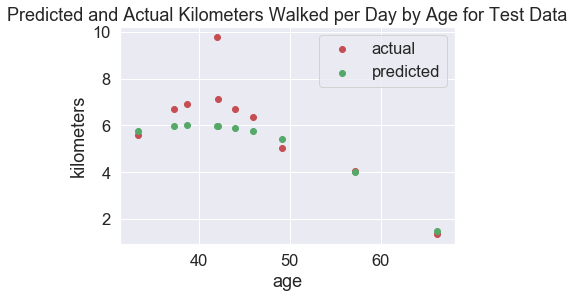

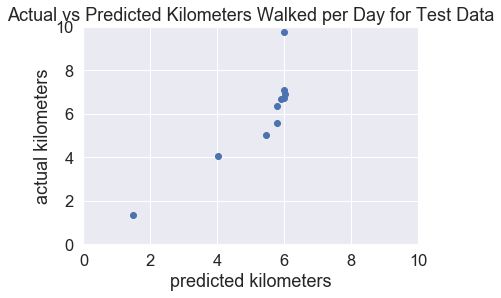

In [12]:
#your code goes here
# Get predictions for the test data 
test = pd.concat([pd.DataFrame({'actual':y_test}), X_test], axis=1)
test['predicted'] = model.predict(test['age'])

# Plot predicted vs true kilometers by age for test data
plt.scatter(X_test, test['actual'], c='r')
plt.scatter(X_test, test['predicted'], c='g')
plt.title('Predicted and Actual Kilometers Walked per Day by Age for Test Data')
plt.xlabel('age')
plt.ylabel('kilometers')
plt.legend()
plt.show()

# Model fit to the test data is quite good - of the 10 actual test data points, there is only one MAJOR predicted 
# outlier -- the predicted and actual kilometers walked per day for an individual around 42-43 years old was off by 
# nearly 4 kilometers. The rest of the 9 actual test data points and their predictions are within ~1km or less 
# of each other.

plt.scatter(test['predicted'], test['actual'], c='b')
plt.title('Actual vs Predicted Kilometers Walked per Day for Test Data')
plt.xlabel('predicted kilometers')
plt.ylabel('actual kilometers')
axes = plt.gca()
axes.set_xlim([0,10])
axes.set_ylim([0,10])
plt.show()
# Just plotting kilometers walked per day, we more clearly see how well the fit is. The test data actual and 
# predicted values follow a straight line for the most part, except for 1 gross outlier, mentioned above.